In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Deep-Learning/Deep-Learning/(07) التنبؤ بالزبائن المهمين باستخدام الشبكات العصبية/customers.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
value_counts = df['y'].value_counts()
value_counts

,count
y,
no,39922
yes,5289


In [8]:
from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('y', axis=1)

class_column = df['y']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)

df = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

In [9]:
class_distribution = df['y'].value_counts()
class_distribution

,count
y,
no,39922
yes,39922


In [10]:
X = df.iloc[:,0:16].values

y = df.iloc[:,-1]

In [11]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)

In [12]:
print(y)

[0 0 0 ... 1 1 1]


In [13]:
X_job = X[:,[1]]
print(np.unique(X_job))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       sparse_threshold=0)

X_job = ct.fit_transform(X_job)

print(X_job.shape)

(79844, 12)


In [15]:
print(X_job)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [16]:
X_cat = X[:,[1, 2, 3, 4, 6, 7, 8, 10, 15]]

In [17]:
X_cat.shape

(79844, 9)

In [18]:
orginalNumOfCols = X_cat.shape[1]

for i in range(X_cat.shape[1]):

    currNumOfCols = X_cat.shape[1]

    indexOfColumnToEncode = currNumOfCols - orginalNumOfCols + i

    ct = ColumnTransformer(transformers=
                            [('encoder',
                              OneHotEncoder(), [indexOfColumnToEncode])],
                           remainder='passthrough',
                           sparse_threshold=0)

    X_cat = ct.fit_transform(X_cat)

In [19]:
X_cat.shape

(79844, 44)

In [20]:
X_num = X[:,[0, 5, 9, 11, 12, 13, 14]]

X = np.concatenate((X_num,X_cat), axis=1)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8337 - loss: 0.3844 - val_accuracy: 0.8677 - val_loss: 0.3122
Epoch 2/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8821 - loss: 0.2899 - val_accuracy: 0.8842 - val_loss: 0.2884
Epoch 3/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8937 - loss: 0.2660 - val_accuracy: 0.8867 - val_loss: 0.2810
Epoch 4/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9013 - loss: 0.2506 - val_accuracy: 0.8972 - val_loss: 0.2600
Epoch 5/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9124 - loss: 0.2256 - val_accuracy: 0.9023 - val_loss: 0.2563
Epoch 6/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9166 - loss: 0.2168 - val_accuracy: 0.9074 - val_loss: 0.2474
Epoch 7/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9227 - loss: 0.2036 - val_accuracy: 0.9096 - val_loss: 0.2451
Epoch 8/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9271 - loss: 

In [24]:
from keras.layers import Dropout

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8007 - loss: 0.4342 - val_accuracy: 0.8662 - val_loss: 0.3199
Epoch 2/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8714 - loss: 0.3179 - val_accuracy: 0.8712 - val_loss: 0.3095
Epoch 3/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8779 - loss: 0.2996 - val_accuracy: 0.8763 - val_loss: 0.3009
Epoch 4/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8866 - loss: 0.2865 - val_accuracy: 0.8840 - val_loss: 0.2931
Epoch 5/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8908 - loss: 0.2740 - val_accuracy: 0.8911 - val_loss: 0.2806
Epoch 6/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8921 - loss: 0.2712 - val_accuracy: 0.8874 - val_loss: 0.2858
Epoch 7/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8951 - loss: 0.2620 - val_accuracy: 0.8971 - val_loss: 0.2659
Epoch 8/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8988 - loss:

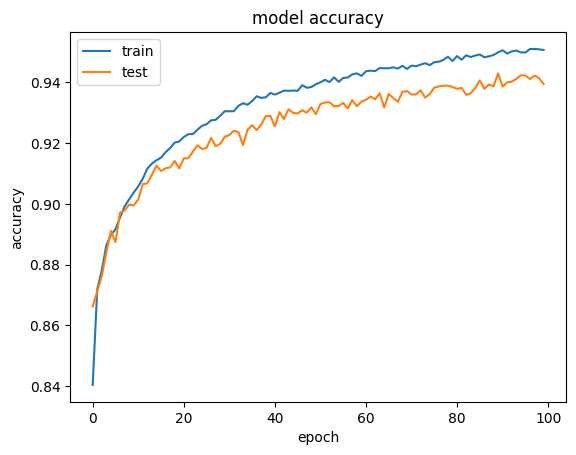

In [25]:
import matplotlib.pyplot as plt

plt.plot(classifierHistory.history['accuracy'])
plt.plot(classifierHistory.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
evaluation = classifier.evaluate(X_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1877
Loss: 0.1954411268234253
Accuracy: 0.93943190574646


In [27]:
y_pred = classifier.predict(X_test)

y_pred_binary = (y_pred > 0.5)

print(y_pred_binary)

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", round(100*accuracy,2))


precision = precision_score(y_test, y_pred_binary)
print("Precision:", round(100*precision,2))

recall = recall_score(y_test, y_pred_binary)
print("Recall:", round(100*recall,2))

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", round(100*f1,2))

Accuracy: 93.94
Precision: 90.01
Recall: 98.99
F1 Score: 94.29
